<div style="border:solid green 2px; padding: 20px">

<b>Привет, Георгий! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Определение неэффективных операторов

Помогите «Нупозвони» найти самых неэффективных операторов. Признаки низкой
эффективности:

- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.

**Ход исследования**

Исследование пройдёт в четыре этапа:

*    Обзор  и предобработка данных;
*    Анализ данных;
*    Проверка гипотез;
*    Презентация.

## Описание данных

Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальный телефонии. 

Его клиенты — колл-центры, которые:
- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы — вызовы друг между другом
внутри сети виртуальной телефонии.

Данные о колл-центрах (файл ` telecom_dataset.csv`)


- `user_id`  — Идентификатор клиентского аккаунта колл-центра в сервисе
- `date`  — Дата статистики
- `direction`  — Направление вызовов (out - исходящий вызов, in — входящий
- вызов)
- `internal`  — Является ли звонок внутренним звонком между операторами клиента
- `operator_id`  — Идентификатор оператора
- `is_missed_call`  — Является ли звонок пропущенным
- `calls_count`  — Количество звонков
- `call_duration`  — Длительность звонка (без учета времени ожидания)
- `total_call_duration`  — Длительность звонка (с учетом времени ожидания)

## Обзор данных


In [1]:
# импорт библиотек

from scipy import stats as st
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# чтение файла с данными и сохранение в df

try:
    calls = pd.read_csv('/datasets/telecom_dataset.csv')

except:
    calls = pd.read_csv('telecom_dataset.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
calls.sample(20)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
20369,167002,2019-10-25 00:00:00+03:00,out,False,900492.0,False,8,248,366
19496,166983,2019-11-14 00:00:00+03:00,in,False,NaN,True,5,0,107
18392,166974,2019-10-18 00:00:00+03:00,in,False,900352.0,False,9,821,974
43174,167977,2019-11-20 00:00:00+03:00,in,False,944218.0,True,2,0,223
23499,167082,2019-10-30 00:00:00+03:00,out,False,900788.0,False,1,124,134
3920,166495,2019-10-30 00:00:00+03:00,in,False,NaN,True,1,0,2
1684,166405,2019-11-23 00:00:00+03:00,out,False,902532.0,True,1,0,36
24998,167125,2019-09-17 00:00:00+03:00,out,False,902744.0,True,62,0,987
6133,166541,2019-09-14 00:00:00+03:00,in,False,NaN,True,5,0,268
21986,167052,2019-10-29 00:00:00+03:00,in,False,904038.0,False,1,171,182


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
При использовании `sample` лучше фиксировать параметр `random_state`, так гарантируется, что и ты и заказчик увидите одни и теже данные)
</div>

In [5]:
list(calls.columns)

['user_id',
 'date',
 'direction',
 'internal',
 'operator_id',
 'is_missed_call',
 'calls_count',
 'call_duration',
 'total_call_duration']

In [6]:
calls.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [7]:
calls[calls['operator_id'].isna() == True].sample(50)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
35325,167532,2019-09-27 00:00:00+03:00,in,False,NaN,True,3,0,143
14535,166837,2019-11-19 00:00:00+03:00,in,False,NaN,True,29,0,63
2829,166482,2019-09-10 00:00:00+03:00,in,False,NaN,True,1,0,2
41665,167888,2019-10-27 00:00:00+03:00,in,False,NaN,True,3,0,91
51719,168336,2019-11-18 00:00:00+03:00,in,False,NaN,True,1,0,15
3659,166487,2019-09-25 00:00:00+03:00,in,False,NaN,True,4,0,8
51410,168295,2019-11-22 00:00:00+03:00,in,False,NaN,True,6,0,200
17795,166955,2019-09-25 00:00:00+03:00,in,False,NaN,True,2,0,14
10221,166678,2019-08-31 00:00:00+03:00,in,True,NaN,True,2,0,40
2118,166406,2019-10-21 00:00:00+03:00,in,False,NaN,True,2,0,40


In [8]:
calls.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [9]:
calls.duplicated().sum()

4900

- есть дубликаты - нужно удалить
- есть пропуски в `internal` и `operator_id` - `internal` можно удалить, т.к. пропуски составляют менее 1%; `operator_id` тоже удаляем, так как это самая нужная нам метрика и без нее никак. Из предварительной оценки пропусков в `operator_id` могу предположить, что большая часть звонков - входящие и пропущенные. Возможен сбой на моменте приема звонка системой до этапа назначания оператора.
- также тип `operator_id` стоит заменить на `int`
- привести дату к более укороченному виду

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Хорошо, что ты пытался выстроить закономерности в строках с пропущенными `id оператора`, но ведь можно было построить агрегированную таблицу, посмотреть какие значения столбца `internal` для пропущенных
</div>

## Предобработка данных

### Проверка на наличие дубликатов

In [10]:
calls = calls.drop_duplicates().reset_index(drop=True)
calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
48998,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
48999,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
49000,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [11]:
calls.duplicated().sum()

0

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.0+ MB


### Пропуски данных

In [13]:
calls.dropna(subset = ['internal'], inplace=True)
calls.dropna(subset = ['operator_id'], inplace=True)

In [14]:
calls.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

### Приведение данных к нужному типу/виду

In [15]:
calls['date'] = pd.to_datetime(calls['date'])
calls['date'] = calls['date'].dt.tz_localize(None)

In [16]:
calls.sample(20)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
42895,168187,2019-10-17,in,False,937960.0,False,3,314,317
40628,168062,2019-11-07,out,True,951508.0,False,5,309,347
21277,167082,2019-09-19,out,False,900788.0,True,2,0,49
7154,166649,2019-11-05,in,False,887416.0,False,1,2,32
33452,167626,2019-10-02,out,False,919306.0,True,19,0,655
48171,168361,2019-11-24,out,False,965540.0,False,64,7364,8752
31496,167497,2019-11-23,out,False,924950.0,True,1,0,23
23435,167150,2019-09-17,out,True,905570.0,True,1,0,33
18243,166997,2019-09-28,out,False,909502.0,True,19,0,603
36515,167799,2019-11-05,out,False,925104.0,True,5,0,164


In [17]:
calls['operator_id'] = calls['operator_id'].astype('int64')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Интересное преобразование 
</div>

<div class="alert alert-block alert-info">
Да, здесь немного накуралесил, написал лишнего. Изначально не собирался убирать строки без 'operator_id' - подобная форма позволила мне поменять тип данных игнорируя NaN. Забыл поменять на привычную форму.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо, что расписал, что и зачем делал 

</div>

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 49000
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41491 non-null  int64         
 1   date                 41491 non-null  datetime64[ns]
 2   direction            41491 non-null  object        
 3   internal             41491 non-null  object        
 4   operator_id          41491 non-null  int64         
 5   is_missed_call       41491 non-null  bool          
 6   calls_count          41491 non-null  int64         
 7   call_duration        41491 non-null  int64         
 8   total_call_duration  41491 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(2)
memory usage: 2.9+ MB


### Создание доп. столбцов

In [19]:
#создаем доп.столбец по времени ожидания звонка, он нам понадобится 
calls['call_wait'] = calls['total_call_duration'] - calls['call_duration']
calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait
1,166377,2019-08-05,out,True,880022,True,3,0,5,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,25
5,166377,2019-08-05,out,False,880020,False,2,3,29,26
...,...,...,...,...,...,...,...,...,...,...
48996,168606,2019-11-09,out,False,957922,False,4,551,593,42
48997,168606,2019-11-10,out,True,957922,False,1,0,25,25
48998,168606,2019-11-10,out,True,957922,True,1,0,38,38
48999,168606,2019-11-11,out,True,957922,False,2,479,501,22


In [20]:
operator_direction = calls.pivot_table(
    index='operator_id',
    columns = 'direction',
    values='date',
    aggfunc='count')
operator_direction = operator_direction.fillna(0)
operator_direction

direction,in,out
operator_id,,
879896,21.0,96.0
879898,56.0,170.0
880020,7.0,13.0
880022,8.0,62.0
880026,18.0,164.0
...,...,...
972410,0.0,4.0
972412,1.0,4.0
972460,1.0,6.0


In [21]:
calls.query('operator_id == 879896').groupby('operator_id')['direction'].value_counts()

operator_id  direction
879896       out          96
             in           21
Name: direction, dtype: int64

In [22]:
operator_direction.loc[operator_direction['in'] < operator_direction['out'], 'op_type'] = 'out'  
operator_direction.loc[operator_direction['in'] > operator_direction['out'], 'op_type'] = 'in'  

In [23]:
calls = calls.merge(operator_direction, how='left', on='operator_id')
calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,in,out,op_type
10596,166803,2019-10-22,in,False,893172,False,1,63,81,18,23.0,2.0,in


In [24]:
calls.drop(['in', 'out'], axis='columns', inplace=True)
calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
5838,166604,2019-11-17,in,False,893402,False,4,277,338,61,in


<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил стоблец по типу оператора. Немного грубовато, извиняюсь, спешу. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Вполне нормально) 
</div>

### Проверка на аномалии и надобности их отсеивания. Подготовка данных к анализу.

#### Оценка временного промежутка выборки

In [25]:
display(calls['date'].min())
calls['date'].max()

Timestamp('2019-08-02 00:00:00')

Timestamp('2019-11-28 00:00:00')

Рассматриваемый период - 4 месяца.

In [26]:
calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
26037,167497,2019-11-07,out,False,924952,False,3,110,148,38,out


In [27]:
#оценим значения числовых параметров
calls[['calls_count', 'call_duration', 'total_call_duration']].describe()

,calls_count,call_duration,total_call_duration
count,41491.000000,41491.000000,41491.000000
mean,16.921381,1010.940011,1323.153238
std,59.786187,4066.666485,4788.953155
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,67.000000
50%,4.000000,106.000000,289.000000
75%,14.000000,772.000000,1107.000000
max,4817.000000,144395.000000,166155.000000


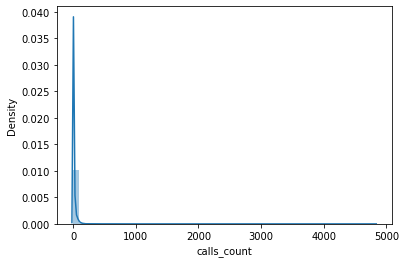

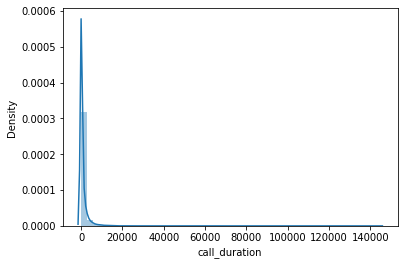

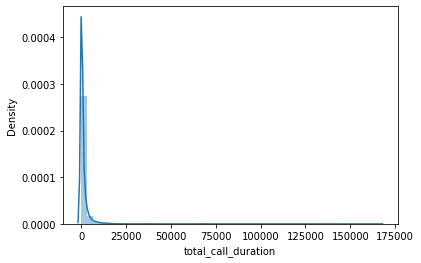

In [28]:
for col in ['calls_count', 'call_duration', 'total_call_duration']:
    sns.distplot(calls[col])
    plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Отлично, что рассматриваешь аномалии, было бы здорово использовать `plotly` для первичного анализа из-за возможности приближать фрагменты значений
</div>

In [29]:
calls[['calls_count', 'call_duration', 'total_call_duration']].median()

calls_count              4.0
call_duration          106.0
total_call_duration    289.0
dtype: float64

Выбросы есть, лучше от них отказаться. Рассмотрим квантили.

In [30]:
display(calls['calls_count'].quantile(0.98))
display(calls['call_duration'].quantile(0.98))
calls['total_call_duration'].quantile(0.98)

107.0

7646.999999999985

9499.199999999953

In [31]:
calls = calls.query('calls_count < 107 & call_duration < 7646 & total_call_duration < 9499')

In [32]:
display(calls['calls_count'].quantile(0.98))
display(calls['call_duration'].quantile(0.98))
calls['total_call_duration'].quantile(0.98)

68.0

4847.32

5470.519999999997

In [33]:
calls[['calls_count', 'call_duration', 'total_call_duration']].median()

calls_count              4.0
call_duration           99.0
total_call_duration    266.0
dtype: float64

In [34]:
calls[['calls_count', 'call_duration', 'total_call_duration']].describe()

,calls_count,call_duration,total_call_duration
count,40185.000000,40185.000000,40185.000000
mean,10.680901,637.703297,824.586189
std,16.243112,1183.332139,1327.636129
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,64.000000
50%,4.000000,99.000000,266.000000
75%,12.000000,696.000000,965.000000
max,106.000000,7644.000000,9440.000000


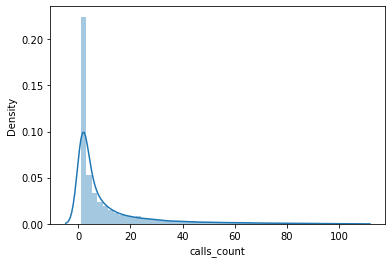

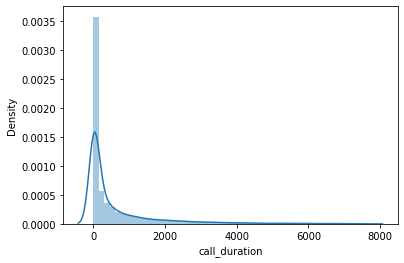

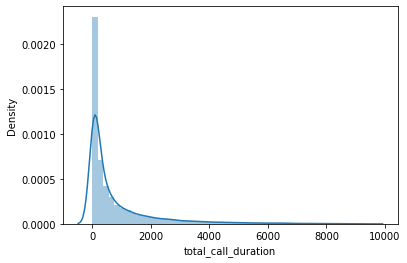

In [35]:
for col in ['calls_count', 'call_duration', 'total_call_duration']:
    sns.distplot(calls[col])
    plt.show()

In [36]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40185 entries, 0 to 41490
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              40185 non-null  int64         
 1   date                 40185 non-null  datetime64[ns]
 2   direction            40185 non-null  object        
 3   internal             40185 non-null  object        
 4   operator_id          40185 non-null  int64         
 5   is_missed_call       40185 non-null  bool          
 6   calls_count          40185 non-null  int64         
 7   call_duration        40185 non-null  int64         
 8   total_call_duration  40185 non-null  int64         
 9   call_wait            40185 non-null  int64         
 10  op_type              40045 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(6), object(3)
memory usage: 3.4+ MB


In [37]:
calls.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
22625,167264,2019-10-01,out,False,919552,False,1,96,114,18,in


Аномалии убрали - данные готовы к анализу.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Спасибо за промежуточные выводы

## Анализ данных

### Агрегация по количеству пропущеных входящих вызовов и выявление взаимосвязей

Классический максимальный показатель пропущенных вызовов в индустрии составляет 5-8%. Предварительно будем ориентироваться на этот показатель.

В общем случае параметр Call Abandon Rate (количество пропущенных звонков) рассчитывается следующим образом для определенного периода:

(общее количество звонков – количество успешно обработанных вызовов) / (общее количество звонков) x 100%

In [38]:
calls.query('op_type == "in" & is_missed_call == True & internal == False')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
2176,166428,2019-09-05,in,False,882680,True,1,0,21,21,in
2179,166428,2019-09-10,in,False,882680,True,1,0,23,23,in
2182,166428,2019-09-13,in,False,882680,True,1,0,49,49,in
2219,166482,2019-10-12,in,False,934076,True,1,0,45,45,in
2234,166482,2019-11-05,in,False,934074,True,1,1,15,14,in
...,...,...,...,...,...,...,...,...,...,...,...
39651,168307,2019-10-29,in,False,945046,True,2,1,83,82,in
39655,168307,2019-10-30,in,False,945046,True,1,0,3,3,in
39658,168307,2019-10-30,out,False,945046,True,3,0,107,107,in
39669,168307,2019-10-31,out,False,945046,True,8,0,133,133,in


In [39]:
missed_calls = (calls.query('op_type == "in" & is_missed_call == True & internal == False').
          groupby('operator_id').
          agg({'calls_count': 'sum', 'is_missed_call': 'sum'}).
          reset_index().
          rename(columns={'is_missed_call' : 'missed_calls'}))
missed_calls['abandon_rate'] = (((missed_calls['calls_count'] - missed_calls['missed_calls'])/missed_calls['calls_count'])*100).round(decimals=2)
missed_calls = missed_calls.sort_values(by=['abandon_rate'], ascending=False)
missed_calls

,operator_id,calls_count,missed_calls,abandon_rate
115,940652,364,16,95.60
108,939370,144,18,87.50
80,924614,16,2,87.50
110,940430,14,2,85.71
109,939708,11,2,81.82
...,...,...,...,...
99,934430,1,1,0.00
100,935548,1,1,0.00
48,911102,3,3,0.00
47,910540,1,1,0.00


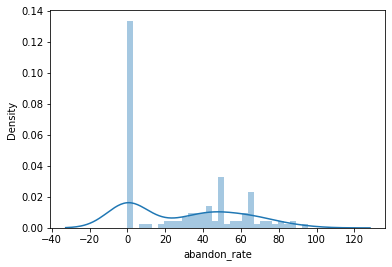

In [40]:
sns.distplot(missed_calls['abandon_rate'], bins=30)
plt.show()

In [41]:
missed_calls['abandon_rate'].describe()

count    134.000000
mean      29.274254
std       28.989733
min        0.000000
25%        0.000000
50%       30.625000
75%       50.000000
max       95.600000
Name: abandon_rate, dtype: float64

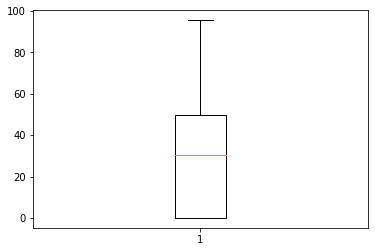

In [42]:
plt.boxplot(missed_calls['abandon_rate'])
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Люблю ящики с усами и при использовании студентами рекомендую [материал](https://www.python-graph-gallery.com/39-hidden-data-under-boxplot) для ознакомления, там различные хитрости изложены
* А почему ты решил высчитывать число пропущенных, а не использовать соответствующие строки?</div>

Приведено кол-во пропущенных вызовов и их соотношение к общему кол-ву вызовов. Мы рассмотрели распределение Call Abandon Rate и выявили операторов с наиболее высоким показателем. Решение оставить стандарт 5-8% по этой метрике.

### Агрегация по длительности ожидания ответа при входящих внешних вызовах и выявление взаимосвязей

Показатель средней скорости ответа (ASA – англ. average speed of answer) определяется как среднее количество времени, необходимое операторам call-центра, для того чтобы отвечать на телефонные звонки. В этом показателе учитываются также и все звонки, которые не были приняты в течение первых 20 секунд вызова. **Поэтому единый усредненный стандарт для этого показателя составляет 28 секунд**

In [43]:
calls.query('op_type == "in"')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
482,166391,2019-08-06,in,False,882476,False,1,175,186,11,in
483,166391,2019-08-07,in,True,882478,False,2,11,74,63,in
484,166391,2019-08-07,in,False,882478,False,1,57,70,13,in
485,166391,2019-08-07,out,True,882478,True,1,0,7,7,in
486,166391,2019-09-23,in,False,882476,False,1,4,24,20,in
...,...,...,...,...,...,...,...,...,...,...,...
41417,168598,2019-11-20,in,False,958394,False,1,16,21,5,in
41418,168598,2019-11-21,in,False,958394,False,1,15,22,7,in
41419,168598,2019-11-25,in,False,958394,False,4,2108,2134,26,in
41420,168598,2019-11-27,in,False,958394,False,2,89,100,11,in


In [44]:
waiting_time = (calls.query('op_type == "in" & internal == False').
          groupby('operator_id').
          agg({'calls_count': 'sum', 'call_wait': 'sum'}).
          reset_index())
waiting_time['call_wait_per_call'] = waiting_time['call_wait'] / waiting_time['calls_count']
waiting_time.head(10).sort_values(by=['call_wait_per_call'], ascending=False)

,operator_id,calls_count,call_wait,call_wait_per_call
0,882476,3,95,31.666667
7,886892,2,58,29.000000
4,884408,40,1016,25.400000
9,888406,15,328,21.866667
8,887416,18,301,16.722222
2,882680,97,1565,16.134021
6,886674,11,168,15.272727
1,882478,1,13,13.000000
5,884524,2,19,9.500000
3,884294,1,6,6.000000


In [45]:
waiting_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   operator_id         320 non-null    int64  
 1   calls_count         320 non-null    int64  
 2   call_wait           320 non-null    int64  
 3   call_wait_per_call  320 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 10.1 KB


In [46]:
waiting_time['call_wait'].describe()

count      320.000000
mean      1799.275000
std       5815.240904
min          1.000000
25%         57.750000
50%        211.500000
75%        852.250000
max      53048.000000
Name: call_wait, dtype: float64

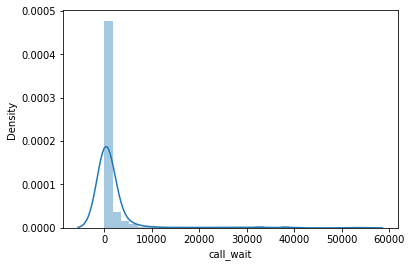

In [47]:
sns.distplot(waiting_time['call_wait'], bins=30)
plt.show()

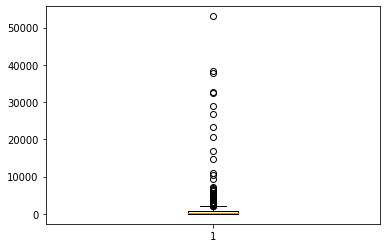

In [48]:
plt.boxplot(waiting_time['call_wait'])
plt.show()

Приведены метрики средней длительности ожидания звонка для каждого оператора. Мы рассмотрели распределение средней скорости ответа и выявили операторов с наиболее высокими показателями. Решение оставить стандарт в 28 секунд по этой метрике.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

`call_wait` - ведь суммарное время ожидания по всем звонкам за день, лучше бы взять время ожидания на 1 звонок
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Графики ведь некоторые так и остались по `call_wait`
</div>

### Агрегация по количеству исходящих звонков (для операторов соответствующей специализации) и выявление взаимосвязей

На исходящей линии хороший продажник совершает в среднем от 100-120 звонков за смену. Соответственно предварительные границы ставим такие.

In [49]:
calls.query('op_type == "out" & internal == False').sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_wait,op_type
27167,167532,2019-10-23,out,False,917852,False,26,2500,2768,268,out
28467,167626,2019-10-08,out,False,919314,False,89,6525,8170,1645,out
9171,166708,2019-10-26,in,False,899082,False,4,262,328,66,out
20324,167150,2019-11-15,out,False,905542,False,32,2625,2962,337,out
36431,168187,2019-10-24,out,False,937782,False,1,6,10,4,out
20842,167175,2019-10-20,out,False,905842,False,11,2090,2222,132,out
36442,168187,2019-10-24,out,False,937760,False,5,464,518,54,out
16420,167035,2019-10-23,in,False,923528,False,3,177,235,58,out
3355,166503,2019-11-25,in,False,906680,False,6,412,627,215,out
14155,166983,2019-09-03,in,False,901880,False,29,1908,2047,139,out


In [50]:
calls_out = (calls.query('direction == "out" & internal == False').
          groupby('operator_id').
          agg({'date':'count', 'calls_count': 'sum'}).
          reset_index().
          rename(columns={'calls_count' : 'calls_out'}))
calls_out['avg_per_day'] = calls_out['calls_out']/calls_out['date']
calls_out = calls_out.sort_values(by=['avg_per_day'], ascending=False)
display(calls_out.tail(20))
calls_out.head(20)

,operator_id,date,calls_out,avg_per_day
757,955164,3,3,1.0
756,955094,1,1,1.0
313,918888,3,3,1.0
309,917890,1,1,1.0
751,954378,1,1,1.0
750,954376,1,1,1.0
749,954318,1,1,1.0
748,954086,1,1,1.0
308,917876,2,2,1.0
92,894230,1,1,1.0


,operator_id,date,calls_out,avg_per_day
342,919364,13,1091,83.923077
321,919162,20,1508,75.400000
654,945286,17,1241,73.000000
555,938070,6,436,72.666667
341,919362,17,1216,71.529412
356,919504,18,1233,68.500000
345,919374,26,1766,67.923077
339,919314,16,1085,67.812500
650,945278,23,1558,67.739130
674,945900,24,1557,64.875000


In [51]:
calls_out.query('date <= 5')

,operator_id,date,calls_out,avg_per_day
559,938080,5,316,63.20
807,965544,5,271,54.20
618,941390,5,229,45.80
495,934426,5,222,44.40
727,951648,4,161,40.25
...,...,...,...,...
102,896010,2,2,1.00
285,914816,4,4,1.00
601,940610,1,1,1.00
731,952196,1,1,1.00


In [52]:
calls_out.query('date <= 3')

,operator_id,date,calls_out,avg_per_day
736,952466,2,79,39.500000
108,896386,2,76,38.000000
626,943050,2,73,36.500000
325,919190,3,83,27.666667
426,925134,2,44,22.000000
...,...,...,...,...
735,952462,1,1,1.000000
102,896010,2,2,1.000000
601,940610,1,1,1.000000
731,952196,1,1,1.000000


In [53]:
calls_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 342 to 231
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   operator_id  833 non-null    int64  
 1   date         833 non-null    int64  
 2   calls_out    833 non-null    int64  
 3   avg_per_day  833 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 32.5 KB


In [54]:
calls_out['avg_per_day'].describe()

count    833.000000
mean      12.506986
std       16.881843
min        1.000000
25%        2.000000
50%        4.018182
75%       15.526316
max       83.923077
Name: avg_per_day, dtype: float64

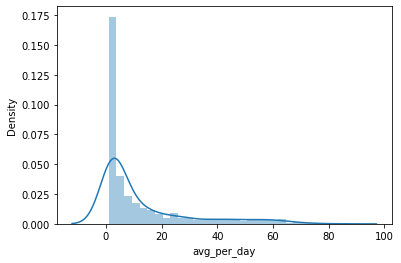

In [55]:
sns.distplot(calls_out['avg_per_day'], bins=30)
plt.show()

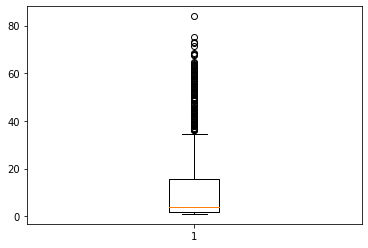

In [56]:
plt.boxplot(calls_out['avg_per_day'])
plt.show()

Приведены метрики по количеству исходящих звонков для каждого оператора. Мы рассмотрели количеству исходящих звонков в день и выявили операторов с наиболее низкими показателями. 

Здесь результат гораздо хуже, чем по остальным метрикам. Среднее кол-во звонков в день - 12 по нашей выборке. Звучит ужасно. Огромная часть операторов не проработало даже 5 дней, и у тех порой максимум 1 звонок в день. Ради того, чтобы хоть как то выделить тех, кто старается - занизим стандарт для наших целей до 80 звонков в день.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Действительно операторы осуществляют чрезвычайно мало звонков, как будто бы это не их основная обязанность. 
   

## Систематизация выявления неэффективных операторов

Для начала соединим полученные нами метрики в одну таблицу

In [57]:
calls.query('op_type == "out"').pivot_table(
    index='operator_id',
    columns = 'direction',
    values='date',
    aggfunc='count').sort_values(by='in', ascending=False)

direction,in,out
operator_id,,
893804,107.0,182.0
901880,106.0,194.0
901884,95.0,228.0
885890,94.0,8.0
885876,90.0,67.0
...,...,...
970484,NaN,3.0
970486,NaN,4.0
972408,NaN,2.0


In [58]:
final_table = calls.query('internal == False').pivot_table(index='operator_id')
final_table.drop(['calls_count', 'call_duration', 'user_id', 'call_wait', 'is_missed_call', 'total_call_duration'], axis='columns', inplace=True)
final_table

""
operator_id
879896
879898
880020
880022
880026
...
972410
972412
972460


In [59]:
final_table = final_table.merge(missed_calls, on='operator_id', how='left')
final_table = final_table.merge(waiting_time, on='operator_id', how='left')
final_table = final_table.merge(calls_out, on='operator_id', how='left')
final_table = final_table.merge(operator_direction, how='left', on='operator_id')
final_table.drop(['calls_count_x', 'calls_count_y', 'call_wait', 'date', 'in', 'out'], axis='columns', inplace=True)
final_table = final_table.fillna(-1)
final_table

,operator_id,missed_calls,abandon_rate,call_wait_per_call,calls_out,avg_per_day,op_type
0,879896,-1.0,-1.0,-1.0,686.0,8.575000,out
1,879898,-1.0,-1.0,-1.0,6449.0,43.281879,out
2,880020,-1.0,-1.0,-1.0,34.0,3.400000,out
3,880022,-1.0,-1.0,-1.0,174.0,3.222222,out
4,880026,-1.0,-1.0,-1.0,2188.0,14.490066,out
...,...,...,...,...,...,...,...
1050,972410,-1.0,-1.0,-1.0,77.0,19.250000,out
1051,972412,-1.0,-1.0,-1.0,60.0,15.000000,out
1052,972460,-1.0,-1.0,-1.0,47.0,11.750000,out
1053,973120,-1.0,-1.0,-1.0,3.0,1.500000,out


In [60]:
final_table_in = final_table.query('op_type == "in"')
final_table_in

,operator_id,missed_calls,abandon_rate,call_wait_per_call,calls_out,avg_per_day,op_type
8,882476,-1.0,-1.00,31.666667,-1.0,-1.0,in
9,882478,-1.0,-1.00,13.000000,-1.0,-1.0,in
10,882680,3.0,0.00,16.134021,-1.0,-1.0,in
19,884294,-1.0,-1.00,6.000000,-1.0,-1.0,in
21,884408,3.0,57.14,25.400000,9.0,1.8,in
...,...,...,...,...,...,...,...
1032,969288,1.0,50.00,21.800000,2.0,2.0,in
1046,971100,-1.0,-1.00,8.666667,-1.0,-1.0,in
1047,971102,-1.0,-1.00,17.789474,-1.0,-1.0,in
1048,971354,-1.0,-1.00,14.000000,-1.0,-1.0,in


In [61]:
final_table_out = final_table.query('op_type == "out"')
final_table_out

,operator_id,missed_calls,abandon_rate,call_wait_per_call,calls_out,avg_per_day,op_type
0,879896,-1.0,-1.0,-1.0,686.0,8.575000,out
1,879898,-1.0,-1.0,-1.0,6449.0,43.281879,out
2,880020,-1.0,-1.0,-1.0,34.0,3.400000,out
3,880022,-1.0,-1.0,-1.0,174.0,3.222222,out
4,880026,-1.0,-1.0,-1.0,2188.0,14.490066,out
...,...,...,...,...,...,...,...
1049,972408,-1.0,-1.0,-1.0,6.0,3.000000,out
1050,972410,-1.0,-1.0,-1.0,77.0,19.250000,out
1051,972412,-1.0,-1.0,-1.0,60.0,15.000000,out
1052,972460,-1.0,-1.0,-1.0,47.0,11.750000,out


Напишем функцию для распределения операторов по категориям эффективности

In [62]:
#final_table

In [63]:
def low_performance_score(row):
    
    ''' Назначает баллы наименее эффективным операторам '''
    
    abandon_rate_1 = row['abandon_rate']
    call_wait_1 = row['call_wait_per_call']
    calls_out_1 = row['avg_per_day']
    
    if abandon_rate_1 > 8:
        row['abandon_score'] = 1
        
    if call_wait_1 > 28:
        row['wait_score'] = 1
        
    if -1 < calls_out_1 < 100:
        row['out_score'] = 1
        
    return row

In [64]:
final_table_in = final_table_in.apply(low_performance_score, axis=1)
final_table_in = final_table_in.fillna(0)

In [65]:
final_table_in

,abandon_rate,abandon_score,avg_per_day,call_wait_per_call,calls_out,missed_calls,op_type,operator_id,out_score,wait_score
8,-1.00,0.0,-1.0,31.666667,-1.0,-1.0,in,882476,0.0,1.0
9,-1.00,0.0,-1.0,13.000000,-1.0,-1.0,in,882478,0.0,0.0
10,0.00,0.0,-1.0,16.134021,-1.0,3.0,in,882680,0.0,0.0
19,-1.00,0.0,-1.0,6.000000,-1.0,-1.0,in,884294,0.0,0.0
21,57.14,1.0,1.8,25.400000,9.0,3.0,in,884408,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1032,50.00,1.0,2.0,21.800000,2.0,1.0,in,969288,1.0,0.0
1046,-1.00,0.0,-1.0,8.666667,-1.0,-1.0,in,971100,0.0,0.0
1047,-1.00,0.0,-1.0,17.789474,-1.0,-1.0,in,971102,0.0,0.0
1048,-1.00,0.0,-1.0,14.000000,-1.0,-1.0,in,971354,0.0,0.0


In [66]:
final_table_out = final_table_out.apply(low_performance_score, axis=1)
final_table_out = final_table_out.fillna(0)

In [67]:
final_table_out

,abandon_rate,avg_per_day,call_wait_per_call,calls_out,missed_calls,op_type,operator_id,out_score
0,-1.0,8.575000,-1.0,686.0,-1.0,out,879896,1.0
1,-1.0,43.281879,-1.0,6449.0,-1.0,out,879898,1.0
2,-1.0,3.400000,-1.0,34.0,-1.0,out,880020,1.0
3,-1.0,3.222222,-1.0,174.0,-1.0,out,880022,1.0
4,-1.0,14.490066,-1.0,2188.0,-1.0,out,880026,1.0
...,...,...,...,...,...,...,...,...
1049,-1.0,3.000000,-1.0,6.0,-1.0,out,972408,1.0
1050,-1.0,19.250000,-1.0,77.0,-1.0,out,972410,1.0
1051,-1.0,15.000000,-1.0,60.0,-1.0,out,972412,1.0
1052,-1.0,11.750000,-1.0,47.0,-1.0,out,972460,1.0


In [68]:
final_table_in['total_score'] = final_table_in['abandon_score'] + final_table_in['wait_score']

In [69]:
final_table_out['total_score'] = final_table_out['out_score']

In [70]:
inefficiency_score_in = (final_table_in.
          groupby('total_score').
          agg({'operator_id': 'count'}).
          reset_index().
          rename(columns={'operator_id' : 'inefficient_ops'}).
          sort_values(by=['total_score'], ascending=True))
inefficiency_score_in

,total_score,inefficient_ops
0,0.0,199
1,1.0,112
2,2.0,9


In [71]:
inefficiency_score_out = (final_table_out.
          groupby('total_score').
          agg({'operator_id': 'count'}).
          reset_index().
          rename(columns={'operator_id' : 'inefficient_ops'}).
          sort_values(by=['total_score'], ascending=True))
inefficiency_score_out

,total_score,inefficient_ops
0,0.0,7
1,1.0,707


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Нравится методология определения неэффективных, молодец!

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Единственное, есть ведь операторы, специализириующиеся на входящих, а есть на исходящих, а тут ты схлопнул эти два типа, применив к ним одни критерии
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Благодарю за деление 
</div>

In [72]:
final_table_in.query('total_score == 2').groupby('operator_id')['total_score'].agg('count').reset_index()

,operator_id,total_score
0,919552,1
1,919790,1
2,919792,1
3,919794,1
4,920902,1
5,944210,1
6,944216,1
7,944226,1
8,944228,1


In [73]:
final_table_in.query('total_score == 1').groupby('operator_id')['total_score'].agg('count').reset_index()

,operator_id,total_score
0,882476,1
1,884408,1
2,886892,1
3,890226,1
4,890582,1
...,...,...
107,952678,1
108,956080,1
109,958640,1
110,969288,1


In [74]:
final_table_out.query('total_score == 1').groupby('operator_id')['total_score'].agg('count').reset_index()

,operator_id,total_score
0,879896,1
1,879898,1
2,880020,1
3,880022,1
4,880026,1
...,...,...
702,972408,1
703,972410,1
704,972412,1
705,972460,1


В итоге мы имеем:

По входящим:

- Большая часть операторов (199) справляются со своей работой успешно в рамках заданных нами стандарта.
- 112 имееют недочеты по одному из рассмотренных нами критериями.
- И 9 можно считать совершенно неэффективными в рамках нашего исследования.

По исходящим всё гораздо хуже:

- только 7 операторов отвечают и так уже заниженным стандартам
- в то время как остальные 707 считаются неээфективными в рамках нашего исследования, но только в рамках доступных нам метрик.
- У многих операторов работающих на исходящие вызовы наблюдалось и много входящих - потенциально причина нехватки персонала, оттуда и сильно заниженная эффективность.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Как будто суммарно операторов было больше, чем 123+47+49+12)
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично 
</div>

## Проверка гипотез

Давайте проверим, что Call Abandon Rate (количество пропущенных звонков) для операторов входящих звонков с total_score = 1 отличается от Call Abandon Rate (количество пропущенных звонков) для операторов с total_score = 2.

В качество нулевой возьмем гипотезу о равенстве указанных величин. Соответственно, альтернативной будет гипотеза об отличии этих значений. Критический уровень статистической значимости примем 5%. 

Задача относится к классу проверки гипотезы о равенстве средних двух генеральных совокупностей, решать ее будем методом st.ttest_ind(). Дисперсии выборок можно считать равными, поэтому параметр equal_var = True.

In [75]:
score_sample_1 = final_table_in.query('total_score == 1')
score_sample_2 = final_table_in.query('total_score == 2')

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Call Abandon Rate (количество пропущенных звонков) группы с оценкой 1 равна группе с оценкой 2}\\
   H_1 :\text{Call Abandon Rate (количество пропущенных звонков) группы с оценкой 1 не равна группе с оценкой 2}
 \end{cases}
\end{equation*}$

In [76]:
sample_1 = score_sample_1['abandon_rate']
sample_2 = score_sample_2['abandon_rate']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)

alpha = .05 

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Call Abandon Rate (количество пропущенных звонков) группы с оценкой 1 не равна группе с оценкой 2')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Call Abandon Rate (количество пропущенных звонков) группы с оценкой 1 равна группе с оценкой 2')

p-значение:  0.3855303564156034
Не получилось отвергнуть нулевую гипотезу. Call Abandon Rate (количество пропущенных звонков) группы с оценкой 1 равна группе с оценкой 2


Аналогичную проверку гипотез проведем со средними показателями продолжительности ожидания звонка.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя продолжительность ожидания звонка группы с оценкой 1 равна группе с оценкой 2}\\
   H_1 :\text{Средняя продолжительность ожидания звонка группы с оценкой 1 не равна группе с оценкой 2}
 \end{cases}
\end{equation*}$

In [77]:
sample_1 = final_table_in['missed_calls']
sample_2 = final_table_in['missed_calls']

results = st.ttest_ind(sample_1, sample_2, equal_var = True)

alpha = .05 

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средняя продолжительность ожидания звонка группы с оценкой 1 не равна группе с оценкой 2')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средняя продолжительность ожидания звонка группы с оценкой 1 равна группе с оценкой 2')

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу. Средняя продолжительность ожидания звонка группы с оценкой 1 равна группе с оценкой 2


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    

* Формулировка и проверка стат гипотез отличная, нет вопросов
* Рекомендовал бы ещё построить визуально как распределяется время ожидания по группам, как дополнительная визуализация проверяемых величин

</div>

## Выводы и рекомендации

В ходе работы мы определил метрики выявления неэффективных операторов и систематизировали их поиск.

В итоге мы имеем:

По входящим:

- Большая часть операторов (199) справляются со своей работой успешно в рамках заданных нами стандарта.
- 112 имееют недочеты по одному из рассмотренных нами критериями.
- И 9 можно считать совершенно неэффективными в рамках нашего исследования.

По исходящим всё гораздо хуже:

- только 7 операторов отвечают и так уже заниженным стандартам
- в то время как остальные 707 считаются неээфективными в рамках нашего исследования, но только в рамках доступных нам метрик.
- У многих операторов работающих на исходящие вызовы наблюдалось и много входящих - потенциально причина нехватки персонала, оттуда и сильно заниженная эффективность.
  



Рекомедации:

- Дополнительная мотивация персонала, дополнительное обучение персонала, использование сценариев разговора.
- Автодозвон для исходящих звонков
- Автоматическое распределение входящих вызовов
- Автоматическое переключение статусов
- Подключение СRМ со всей информацией о клиенте и сделанных им заказам

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Разумные рекомедации, есть вопросы конечно, как работают колл-центры, но что поделать). Несколько правок, думаю ты с ними быстро справишься и я приму проект) 

## Дашборд

## Презентация

https://disk.yandex.ru/i/IWliunJyEIYEcQ

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    

**Касательно презентации:** 
* Выводы позволяют донести краткую выжимку, спасибо за них
* Цель исследования задаёт контекст работы
* Нравится наличие нумерации слайдов, чтобы заказчики могли задать вопрос по твоей презентации не с "верните на вон тот слайд с ...", а просто по номеру слайда
    
<br>

</div>